# LSTM Model for WiFi CSI Signal Time Series Classification

Download the dataset from the following link:
https://deakin365.sharepoint.com/:f:/r/sites/GopherIndustries2/Shared%20Documents/Guardian%20Monitor/WiFi_CSI_Data/Room2_npy?csf=1&web=1&e=bvKs0R

By following the steps below, I built, trained, evaluated, and visualized the performance of an LSTM model on the Room 2 dataset, addressing issues such as overfitting and ensuring clear presentation of results.

1. Setting Up the Environment:
    * I imported all necessary libraries and modules. TensorFlow and Keras are used for building the LSTM model, while `sklearn` helps with data preprocessing and evaluation metrics. Matplotlib is used for plotting.
    * I ensured the Graphviz bin directory is in the PATH so that the model visualization can work correctly.
2. Loading and Preparing the Data:
   * I defined the path to the dataset and set a target length for trimming or padding the sequences. Initialized lists to store data and labels, and specified classes to double for balancing.
   * I created a helper function to split long sequences into smaller chunks, making them more manageable for the LSTM model.
   * I traversed through each activity directory, loaded the `.npy` files, and processed each participant's data.
   * I split the data into smaller sequences, normalized them, and stored them in data_list. Also added labels to `labels_list`.
   * I ensured that certain classes were doubled for balancing the dataset.
3. Preprocessing:
   * I converted the lists to numpy arrays for easier manipulation and printed their shapes for verification.
   * I encoded the labels using one-hot encoding and split the data into training and testing sets, ensuring a test size of 20%.
4. Building and Compiling the Model:
   * I built a Sequential LSTM model with three LSTM layers, each followed by dropout and batch normalization layers to prevent overfitting and improve training stability. The final dense layers handle classification.
   * I compiled the model with the Adam optimizer, a learning rate of 0.001, categorical cross-entropy loss, and accuracy as a metric.
   * I printed the model summary and visualized the model architecture to ensure it was built correctly.
5. Training the Model with Early Stopping:
   * I added early stopping to monitor validation loss and prevent overfitting by stopping training if no improvement was seen for 10 epochs.
   * I trained the model with a batch size of 32 for up to 100 epochs, using early stopping to avoid overfitting.
6. Evaluating and Saving the Model:
   * I evaluated the model on the test data and printed the test loss and accuracy. I also retrieved and printed the final training loss and accuracy for comparison.
   * I saved the trained model using the native Keras format.
7. Plotting Training History:
   * I plotted the training and validation accuracy and loss over epochs to visualize the model's performance during training.
8. Making Predictions and Displaying the Confusion Matrix:
   * I made predictions on the test set and converted them back from one-hot encoding to class labels.
   * I generated and displayed the confusion matrix with labels rotated 45 degrees for better readability, and set the plot size to 12x8.

In [1]:
import os
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Define the path to the dataset
dataset_path = 'D:/Veena/Deakin/SIT764/LSTM/Room2_npy/Room2_npy'

# Define the target length for data trimming/padding
target_length = 750

data_list = []
labels_list = []

classes_to_double = ["kneel", "liedown", "pickup"]

# Helper function to split sequences
def split_sequence(sequence, step):
    return [sequence[i:i + step] for i in range(0, len(sequence), step) if len(sequence[i:i + step]) == step]

# Traverse through each activity directory
for activity_folder in os.listdir(dataset_path):
    activity_path = os.path.join(dataset_path, activity_folder)
    print(f"Processing activity: {activity_folder}")

    if os.path.isdir(activity_path):
        for participant_file in os.listdir(activity_path):
            participant_path = os.path.join(activity_path, participant_file)
            if os.path.isfile(participant_path) and participant_file.endswith('.npy'):
                print(f"Loading data from file: {participant_file}")
                data = np.load(participant_path)
                data = np.real(data)

                # Split data into smaller sequences
                data_splits = split_sequence(data, target_length)

                for split_data in data_splits:
                    # Normalize data
                    min_val = np.min(split_data)
                    max_val = np.max(split_data)
                    data_normalized = (split_data - min_val) / (max_val - min_val) if max_val != min_val else np.zeros(split_data.shape)

                    label = activity_folder
                    data_list.append(data_normalized)
                    labels_list.append(label)

                    if label in classes_to_double:
                        data_list.append(data_normalized.copy())  # Double the data
                        labels_list.append(label)  # Double the label

# Convert lists to arrays for machine learning processing
data = np.array(data_list)
labels = np.array(labels_list).reshape(-1, 1)

print("Final data shape:", data.shape)
print("Final labels shape:", labels.shape)

Processing activity: kneel
Loading data from file: kneel_10.npy
Loading data from file: kneel_1.npy
Loading data from file: kneel_2.npy
Loading data from file: kneel_3.npy
Loading data from file: kneel_4.npy
Loading data from file: kneel_5.npy
Loading data from file: kneel_6.npy
Loading data from file: kneel_7.npy
Loading data from file: kneel_8.npy
Loading data from file: kneel_9.npy
Processing activity: liedown
Loading data from file: liedown_1.npy
Loading data from file: liedown_10.npy
Loading data from file: liedown_2.npy
Loading data from file: liedown_3.npy
Loading data from file: liedown_4.npy
Loading data from file: liedown_5.npy
Loading data from file: liedown_6.npy
Loading data from file: liedown_7.npy
Loading data from file: liedown_8.npy
Loading data from file: liedown_9.npy
Processing activity: pickup
Loading data from file: pickup_10.npy
Loading data from file: pickup_2.npy
Loading data from file: pickup_3.npy
Loading data from file: pickup_4.npy
Loading data from file: p

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Encode the labels before splitting the data
encoder = OneHotEncoder(sparse_output=False)
labels_encoded = encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train_encoded.shape)
print("Testing labels shape:", y_test_encoded.shape)

Training data shape: (1451, 750, 90)
Testing data shape: (363, 750, 90)
Training labels shape: (1451, 8)
Testing labels shape: (363, 8)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 750, 128)            │         112,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 750, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 750, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 750, 128)            │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 750, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 750, 128)            │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 299,080 (1.14 MB)

 Trainable params: 298,440 (1.14 MB)

 Non-trainable params: 640 (2.50 KB)

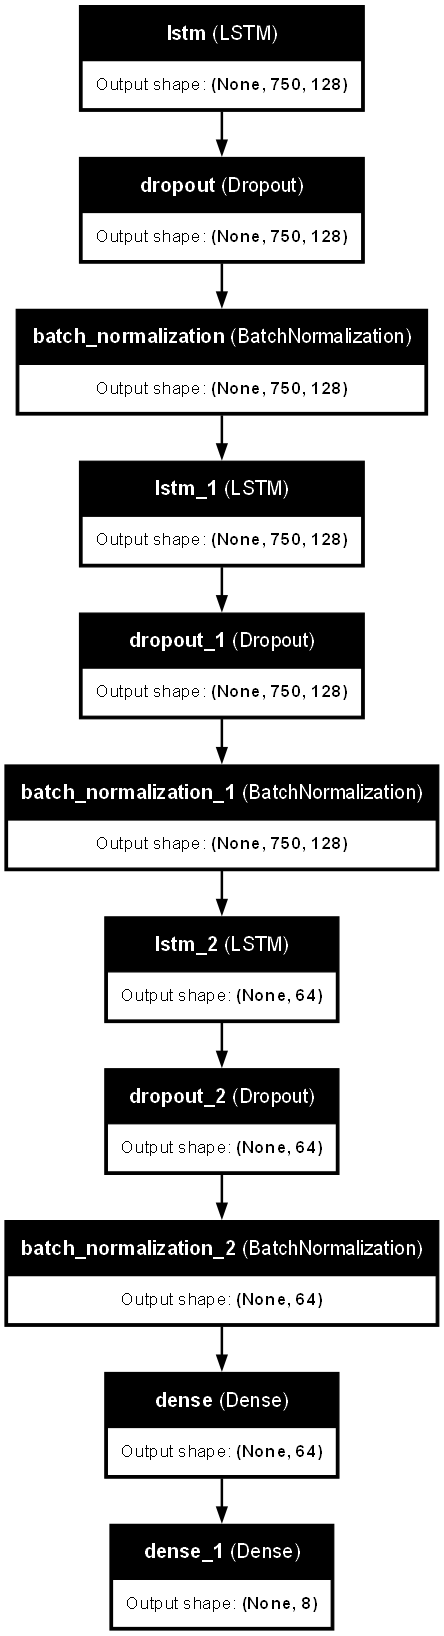

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

# Ensure Graphviz bin directory is in the PATH
os.environ["PATH"] += os.pathsep + 'D:/Veena/Softwares/Graphviz/bin'

# Define the LSTM model
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Compile the model with a different optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Visualize the model architecture with adjusted image size
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True, dpi=90)

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_test, y_test_encoded), callbacks=[early_stopping])

# Get the final training accuracy and loss
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
print(f"Final training loss: {train_loss:.4f}")
print(f"Final training accuracy: {train_accuracy:.4f}")

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.1557 - loss: 2.3840 - val_accuracy: 0.1240 - val_loss: 2.1463
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.1397 - loss: 2.2767 - val_accuracy: 0.1295 - val_loss: 2.1384
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - accuracy: 0.1376 - loss: 2.2417 - val_accuracy: 0.1653 - val_loss: 2.1339
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.1198 - loss: 2.2357 - val_accuracy: 0.1983 - val_loss: 2.1450
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 161s 4s/step - accuracy: 0.1467 - loss: 2.1753 - val_accuracy: 0.1322 - val_loss: 2.2143
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.1701 - loss: 2.1219 - val_accuracy: 0.2645 - val_loss: 1.8967
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 174s 4s/step - accuracy: 0.2546 - loss: 1.9977 - val_accuracy: 0.1791 - val_loss: 3.0863
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.2758 - loss: 1.9499 - val_accuracy: 0.

In [6]:
# Save the model using the native Keras format
model.save('lstm_model.keras')

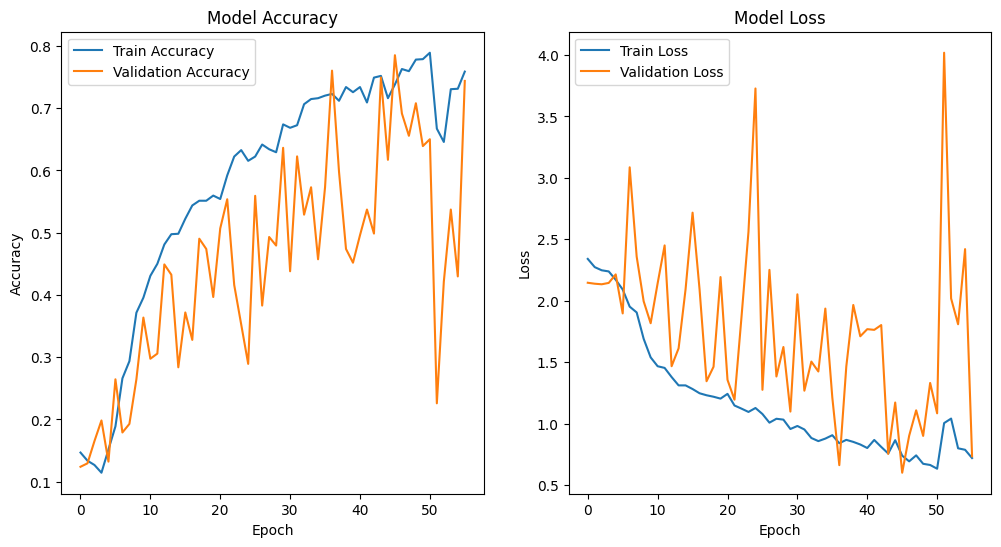

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 541ms/step


<Figure size 1200x800 with 0 Axes>

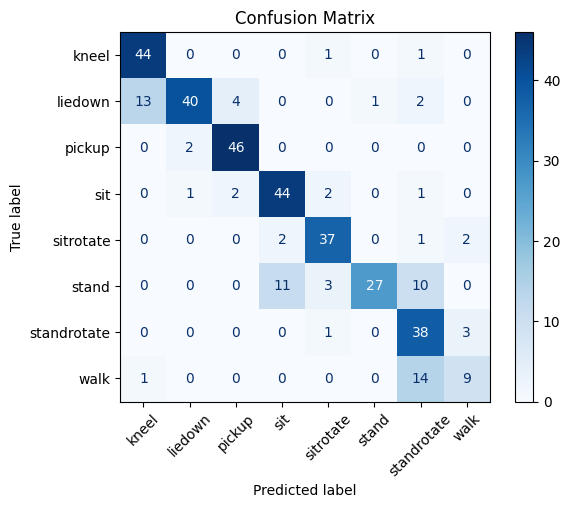

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions
y_pred_encoded = model.predict(X_test)
y_pred = np.argmax(y_pred_encoded, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=encoder.categories_[0])
plt.figure(figsize=(12, 8))
cmd.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()